# Ordinary Least Squares Linear Regression 

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import reset_ramsey
from statsmodels.graphics.regressionplots import plot_partregress_grid

import scipy.stats as stats
from scipy.stats import shapiro

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import a CSV into a Pandas dataframe and inspect the top five rows
df = pd.read_csv('../data/vehicle_sales.csv')
df.head()

,observation,date,vehicles_sold,inventory_in_stock,interest_rate,sales_promo,average_discount,competitor_discount,local_average_temperature,max_sales_bonus,temp_in_china,recession,advertising_budget,random,random2
0,1,01/01/20,141,139,6,0,10,7,41,1628,82,0,4000,86,86
1,2,02/01/20,89,122,7,0,3,13,39,1202,43,1,2500,30,31
2,3,03/01/20,202,241,3,1,20,3,42,2560,47,0,6500,78,51
3,4,04/01/20,121,123,9,0,7,12,59,5226,87,0,4500,34,37
4,5,05/01/20,174,183,2,1,15,3,67,3699,66,0,7000,52,73


In [5]:
#Check the data types for each variable
df.dtypes

observation                   int64
date                         object
vehicles_sold                 int64
inventory_in_stock            int64
interest_rate                 int64
sales_promo                   int64
average_discount              int64
competitor_discount           int64
local_average_temperature     int64
max_sales_bonus               int64
temp_in_china                 int64
recession                     int64
advertising_budget            int64
random                        int64
random2                       int64
dtype: object

In [6]:
#Tell Pandas the date column should be treated as a datetime variable and specify the formatting
df['date'] = pd.to_datetime(df['date'],format='%m/%d/%y')
df.dtypes

observation                           int64
date                         datetime64[ns]
vehicles_sold                         int64
inventory_in_stock                    int64
interest_rate                         int64
sales_promo                           int64
average_discount                      int64
competitor_discount                   int64
local_average_temperature             int64
max_sales_bonus                       int64
temp_in_china                         int64
recession                             int64
advertising_budget                    int64
random                                int64
random2                               int64
dtype: object

In [7]:
#Set the date column as the index so Pandas knows the data are time indexed
df.set_index('date', inplace=True)
df.head()

,observation,vehicles_sold,inventory_in_stock,interest_rate,sales_promo,average_discount,competitor_discount,local_average_temperature,max_sales_bonus,temp_in_china,recession,advertising_budget,random,random2
date,,,,,,,,,,,,,,
2020-01-01,1,141,139,6,0,10,7,41,1628,82,0,4000,86,86
2020-02-01,2,89,122,7,0,3,13,39,1202,43,1,2500,30,31
2020-03-01,3,202,241,3,1,20,3,42,2560,47,0,6500,78,51
2020-04-01,4,121,123,9,0,7,12,59,5226,87,0,4500,34,37
2020-05-01,5,174,183,2,1,15,3,67,3699,66,0,7000,52,73


In [8]:
#Split the dataframe into a dependent variable dataframe and an independent variables dataframe
y = df['vehicles_sold']
xvars = ['inventory_in_stock', 'interest_rate','sales_promo', 'average_discount', 'competitor_discount', 'local_average_temperature', 'max_sales_bonus', 'temp_in_china','recession', 'advertising_budget']
X = df[xvars]

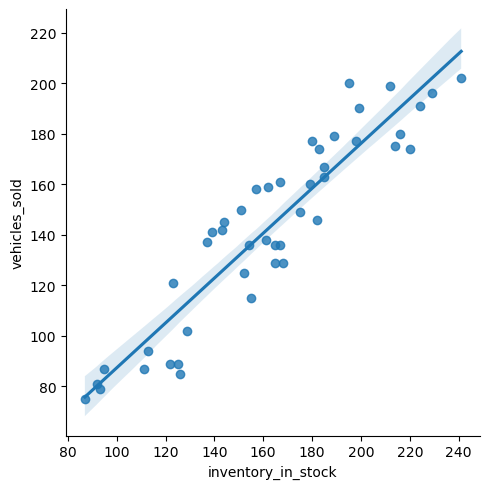

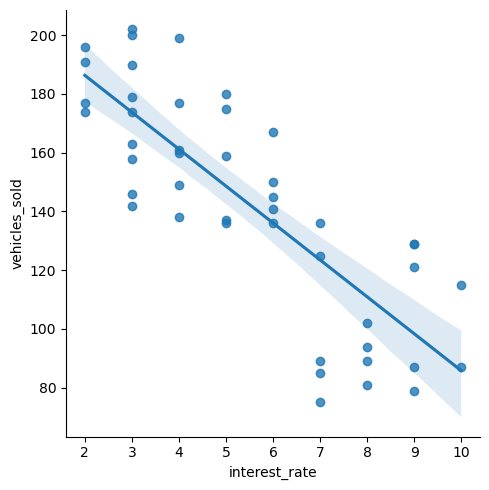

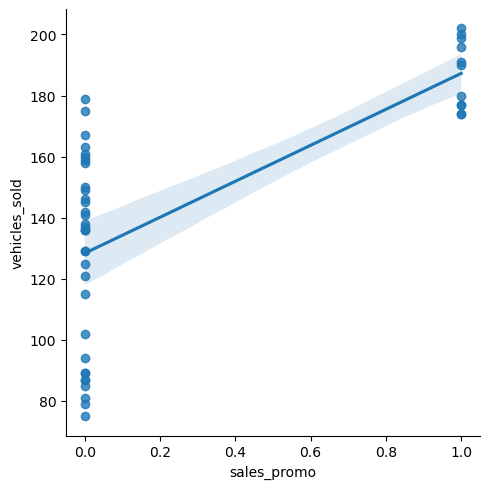

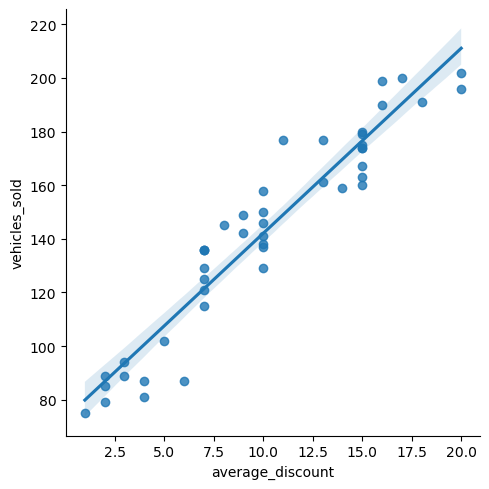

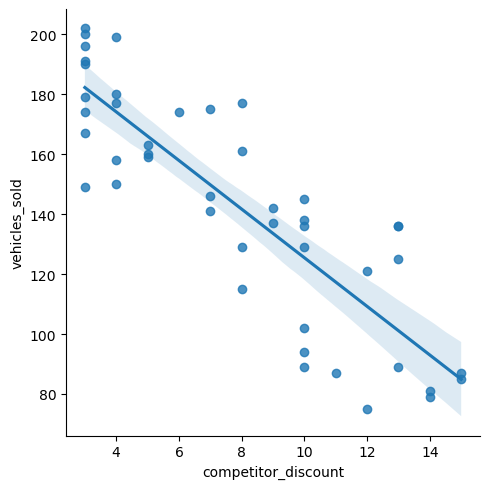

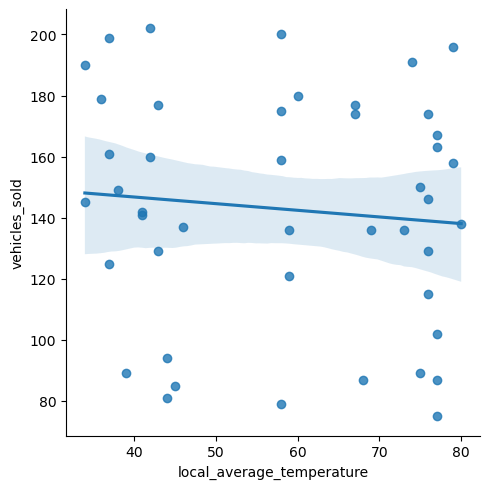

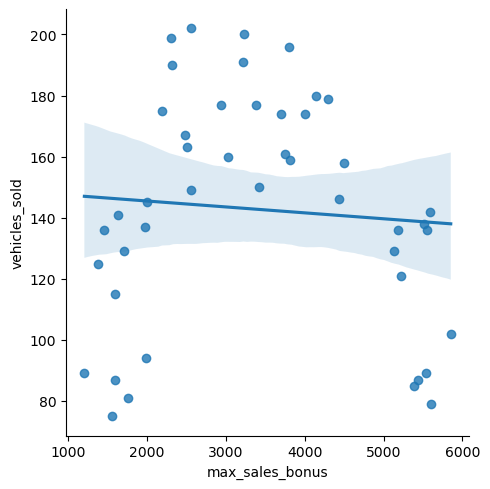

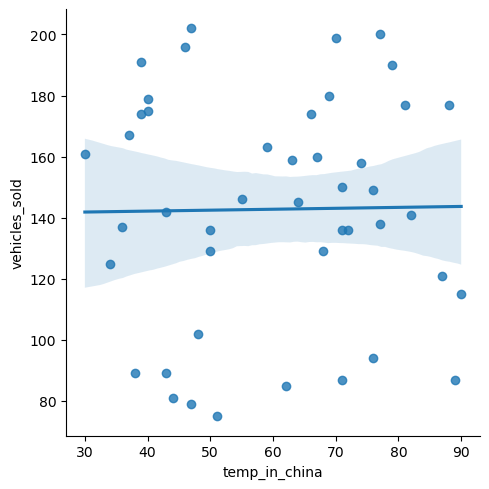

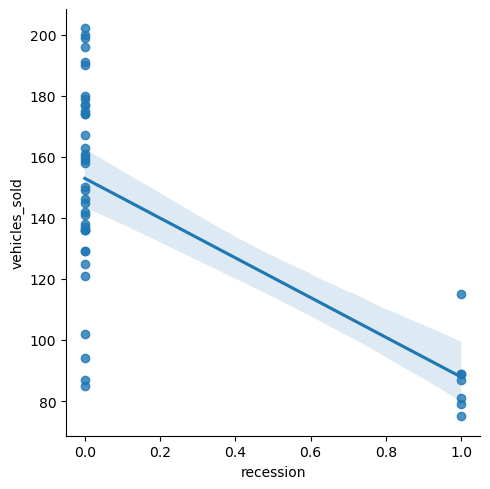

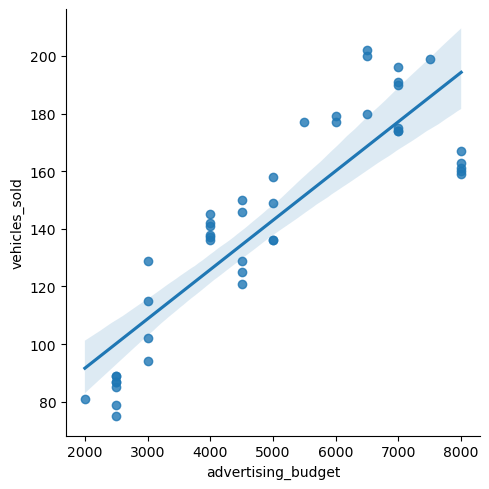

In [9]:
#Plot each independent variable against the dependent variable
for i in xvars:
    sns.lmplot(x=i,y='vehicles_sold', fit_reg=True, data=df)

In [10]:
#Add a constant to the independent variables data frame so that the regression includes an intercept term
X = sm.add_constant(X)
X.head()

,const,inventory_in_stock,interest_rate,sales_promo,average_discount,competitor_discount,local_average_temperature,max_sales_bonus,temp_in_china,recession,advertising_budget
date,,,,,,,,,,,
2020-01-01,1.0,139,6,0,10,7,41,1628,82,0,4000
2020-02-01,1.0,122,7,0,3,13,39,1202,43,1,2500
2020-03-01,1.0,241,3,1,20,3,42,2560,47,0,6500
2020-04-01,1.0,123,9,0,7,12,59,5226,87,0,4500
2020-05-01,1.0,183,2,1,15,3,67,3699,66,0,7000


In [11]:
model1 = sm.OLS(y,X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          vehicles_sold   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     104.6
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           1.55e-22
Time:                        18:05:33   Log-Likelihood:                -148.52
No. Observations:                  45   AIC:                             319.0
Df Residuals:                      34   BIC:                             338.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        76.7273     15.000      5.115      0.000      46.244     107.211
inventory_in_stock            0.2990      0.073      4.087      0.000       0.150       0.448
interest_rate                -2.2493      0.827     -2.718      0.010      -3.931      -0.568
sales_promo                   2.4507      4.193      0.584      0.563      -6.071      10.972
average_discount              2.7318      0.767      3.559      0.001       1.172       4.291
competitor_discount          -0.8003      0.599     -1.336      0.191      -2.018       0.417
local_average_temperature    -0.1634      0.076     -2.141      0.040      -0.319      -0.008
max_sales_bonus               0.0002      0.001      0.273      0.786      -0.002       0.002
temp_in_china                 0.1807      0.074      2.438      0.020       0.030       0.331
recession                    -6.7113      4.300     -1.561      0.128     -15.450       2.027
advertising_budget            0.0014      0.001      0.996      0.326      -0.001       0.004
==============================================================================
Omnibus:                        0.940   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.912
Skew:                          -0.319   Prob(JB):                        0.634
Kurtosis:                       2.719   Cond. No.                     8.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#Gather Regression Statistics and Values
rsquared1 = results1.rsquared
adj_rsquared1 = results1.rsquared_adj
fstat1 = results1.fvalue
aic1 = results1.aic
bic1 = results1.bic
parameters1 = results1.params
tvalues1 = results1.tvalues
pvalues1 = results1.pvalues
ci1 = results1.conf_int(alpha=0.05)

In [13]:
#Generate fitted values and residuals for the model
yhat1 = results1.fittedvalues
e1 = results1.resid

In [14]:
#Add fitted values and residuals to original dataframe for simplicity of plotting
df['yhat1'] = yhat1
df['e1'] = e1
df.head()

,observation,vehicles_sold,inventory_in_stock,interest_rate,sales_promo,average_discount,competitor_discount,local_average_temperature,max_sales_bonus,temp_in_china,recession,advertising_budget,random,random2,yhat1,e1
date,,,,,,,,,,,,,,,,
2020-01-01,1,141,139,6,0,10,7,41,1628,82,0,4000,86,86,140.446034,0.553966
2020-02-01,2,89,122,7,0,3,13,39,1202,43,1,2500,30,31,93.619905,-4.619905
2020-03-01,3,202,241,3,1,20,3,42,2560,47,0,6500,78,51,207.795792,-5.795792
2020-04-01,4,121,123,9,0,7,12,59,5226,87,0,4500,34,37,116.202186,4.797814
2020-05-01,5,174,183,2,1,15,3,67,3699,66,0,7000,52,73,179.336342,-5.336342


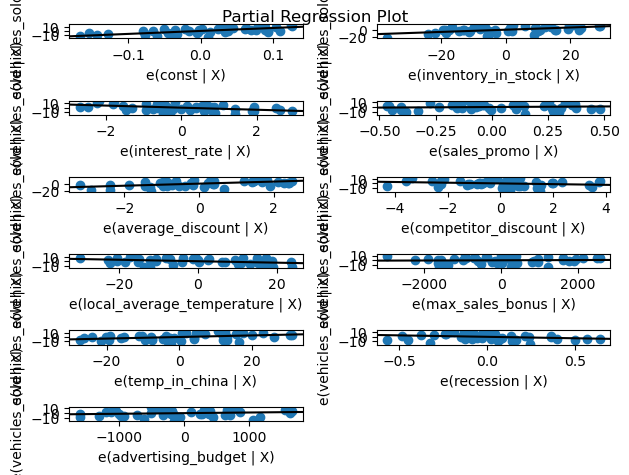

In [15]:
plot_partregress_grid(results1)
plt.show()

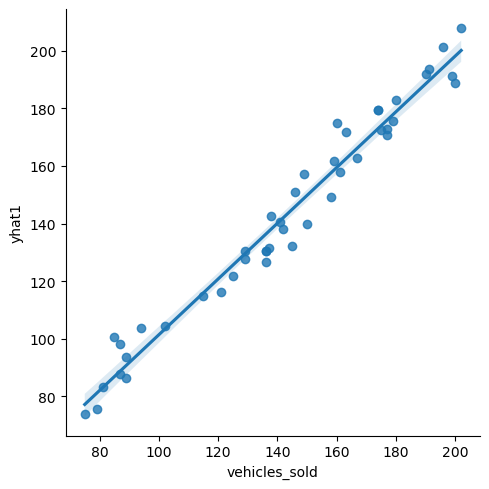

In [22]:
#Plot Y vs Y-Hat to see how well the model's predictions compare with the actual Y values
sns.lmplot(x='vehicles_sold',y='yhat1', fit_reg=True, data=df) 

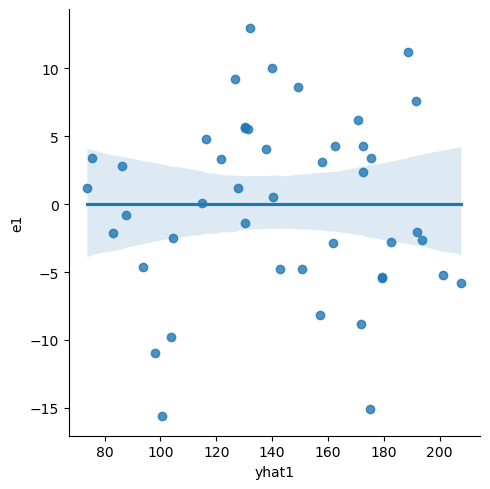

In [23]:
#Plot the fitted values against the residuals
sns.lmplot(x='yhat1',y='e1', fit_reg=True, data=df)

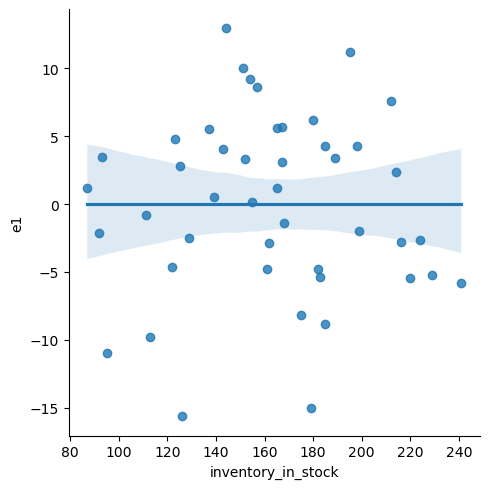

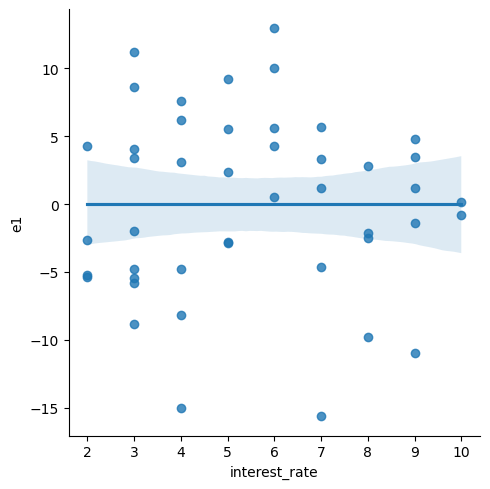

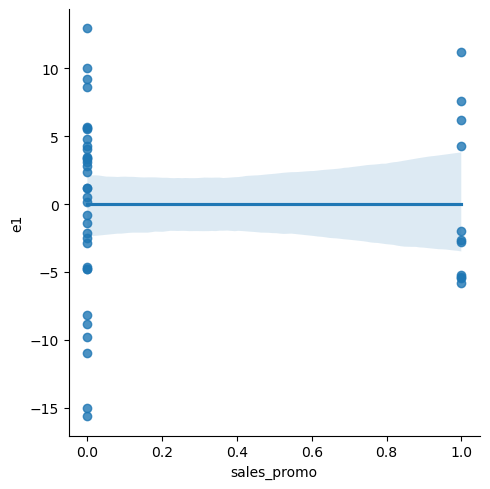

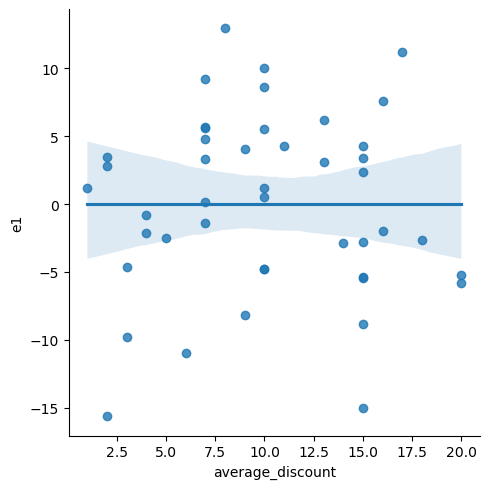

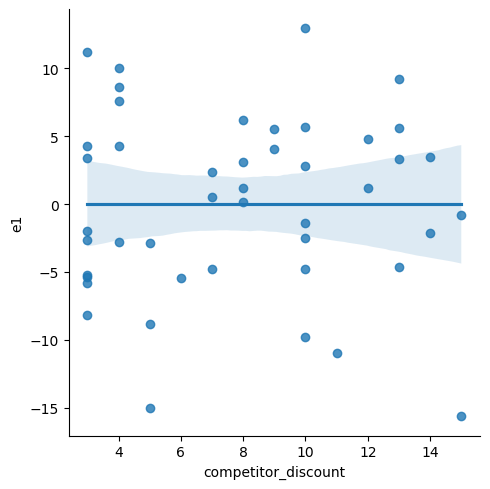

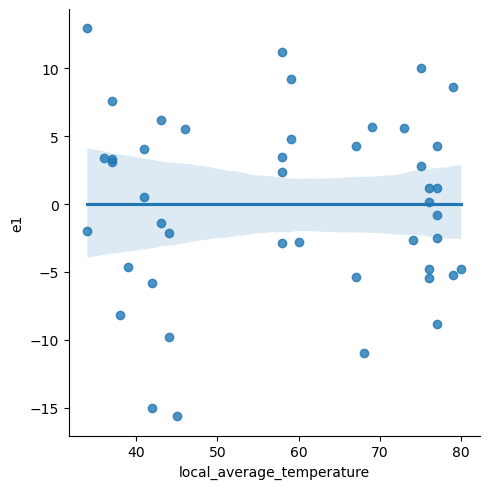

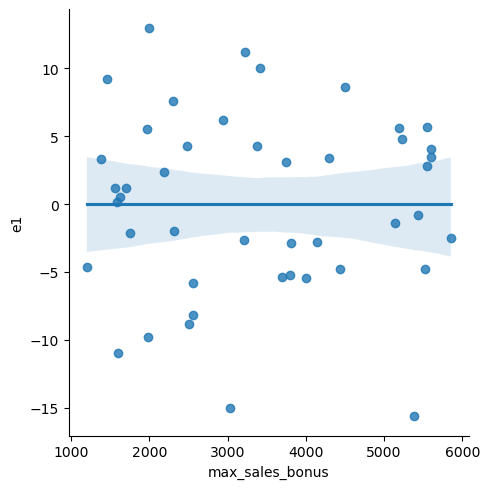

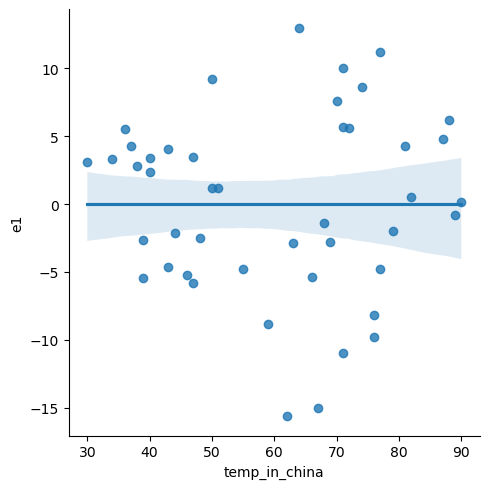

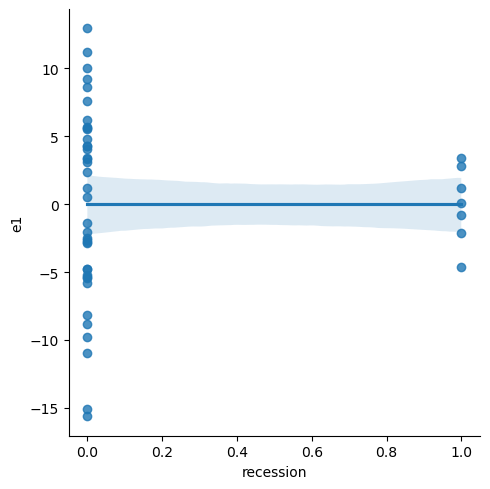

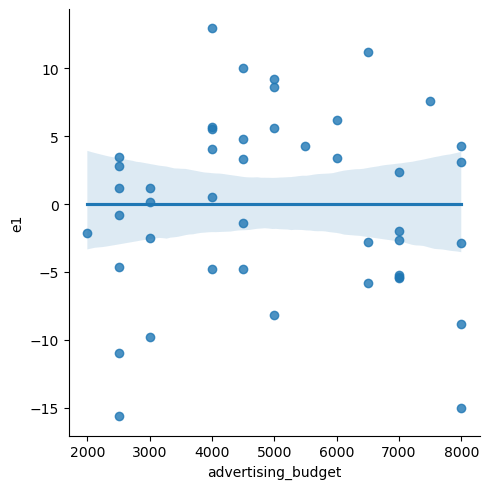

In [30]:
#Plot residuals against x values
for i in xvars:
    sns.lmplot(x=i,y='e1', fit_reg=True, data=df)    

In [34]:
#Correlation matrix to check for multicollinearity.  >0.8 indicates a potential problem
X.corr() 

,const,inventory_in_stock,interest_rate,sales_promo,average_discount,competitor_discount,local_average_temperature,max_sales_bonus,temp_in_china,recession,advertising_budget
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inventory_in_stock,NaN,1.000000,-0.727101,0.683060,0.898319,-0.778975,0.013966,-0.023151,-0.069226,-0.558559,0.808563
interest_rate,NaN,-0.727101,1.000000,-0.584596,-0.760669,0.719288,0.075587,0.012899,0.139840,0.529684,-0.722596
sales_promo,NaN,0.683060,-0.584596,1.000000,0.656221,-0.566110,-0.017190,-0.058713,0.118652,-0.244126,0.510282
average_discount,NaN,0.898319,-0.760669,0.656221,1.000000,-0.849797,-0.034843,-0.127780,-0.077493,-0.573912,0.886046
competitor_discount,NaN,-0.778975,0.719288,-0.566110,-0.849797,1.000000,-0.042117,0.128674,-0.043227,0.488195,-0.748900
local_average_temperature,NaN,0.013966,0.075587,-0.017190,-0.034843,-0.042117,1.000000,0.294418,0.056825,0.140421,-0.078516
max_sales_bonus,NaN,-0.023151,0.012899,-0.058713,-0.127780,0.128674,0.294418,1.000000,0.085990,-0.042771,-0.072108
temp_in_china,NaN,-0.069226,0.139840,0.118652,-0.077493,-0.043227,0.056825,0.085990,1.000000,-0.067381,-0.098381
recession,NaN,-0.558559,0.529684,-0.244126,-0.573912,0.488195,0.140421,-0.042771,-0.067381,1.000000,-0.566080


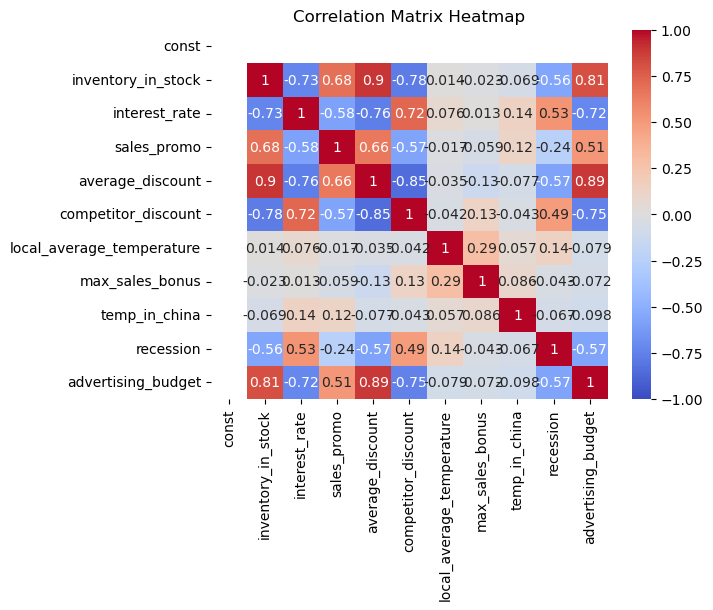

In [37]:
#Multicollinearity Check - Correlation Matrix of X in Heatmap Form!
cor = X.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [39]:
#Transforming Variables - Logs, Squares, and Inverses
#df['log_x'] = np.log(df['x']) #Log(x)
#df['x_squared'] = df['x'] * df['x'] #x^2
#df['x_inverse'] = 1/df['x'] #1/x

#Transforming Variables - Lagged X Variables
#df['x_lag_1'] = df['x'].shift(1)  #1Period Lag
#df['x_lag_2'] = df['x'].shift(2)  #2Period Lag 
#df['x_lag_3'] = df['x'].shift(3)  #3Period Lag 

#Transforming Variables - Interaction Terms
#df['x1INTERACTd'] = df['x1'] * df['d'] #Categorical
#df['x1INTERACTx2'] = df['x1'] * df['x2'] #Continuous

df['ln_vehicles_sold'] = np.log(df['vehicles_sold'])
df['max_sales_bonus_sq'] = df['max_sales_bonus'] * df['max_sales_bonus']
df['advertising_budget_lag1'] = df['advertising_budget'].shift(1)

In [41]:
#If using lagged variables, dropna to ensure equal variable lengths
#df.describe()
#df.dropna(inplace=True)

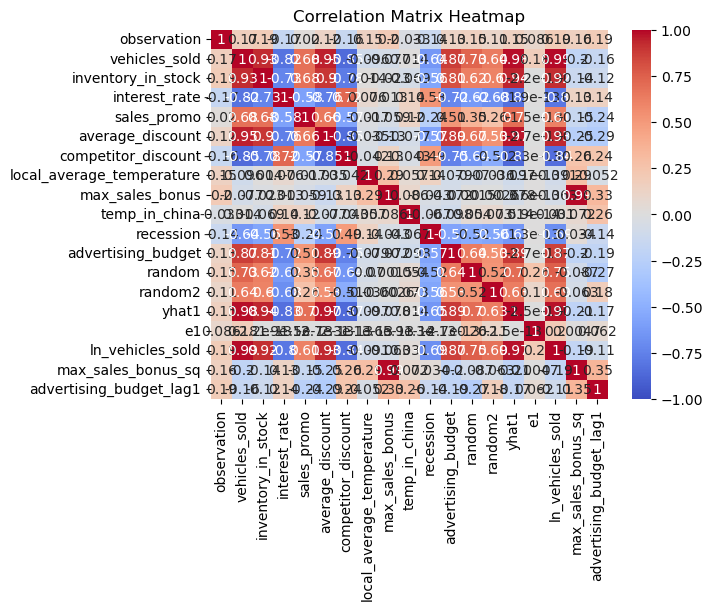

In [43]:
#Multicollinearity Check - Correlation Matrix of X in Heatmap Form!
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [45]:
#Variance Inflation Factor to check for multicollinearity
#A commonly used threshold is VIF > 5 or VIF > 10 to identify problematic multicollinearity.
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF) for Multicollinearity:")
print(vif)

Variance Inflation Factor (VIF) for Multicollinearity:
                     Variable         VIF
0                       const  177.614681
1          inventory_in_stock    6.308254
2               interest_rate    3.112863
3                 sales_promo    2.563544
4            average_discount   12.114179
5         competitor_discount    4.277524
6   local_average_temperature    1.213756
7             max_sales_bonus    1.243575
8               temp_in_china    1.286275
9                   recession    1.917272
10         advertising_budget    5.234189


In [47]:
#Variables with VIF greater than 1, 5, and 10
vif_greater_than_1 = vif[vif['VIF'] > 1]['Variable'].tolist()
vif_greater_than_5 = vif[vif['VIF'] > 5]['Variable'].tolist()
vif_greater_than_10 = vif[vif['VIF'] > 10]['Variable'].tolist()
print("Variables with VIF > 5:", vif_greater_than_5)
print("Variables with VIF > 10:", vif_greater_than_10)

Variables with VIF > 5: ['const', 'inventory_in_stock', 'average_discount', 'advertising_budget']
Variables with VIF > 10: ['const', 'average_discount']


3.505344163083161e-14


(array([2., 1., 3., 7., 7., 5., 9., 5., 4., 2.]),
 array([-15.62700227, -12.76996487,  -9.91292747,  -7.05589006,
         -4.19885266,  -1.34181526,   1.51522214,   4.37225955,
          7.22929695,  10.08633435,  12.94337175]),
 <BarContainer object of 10 artists>)

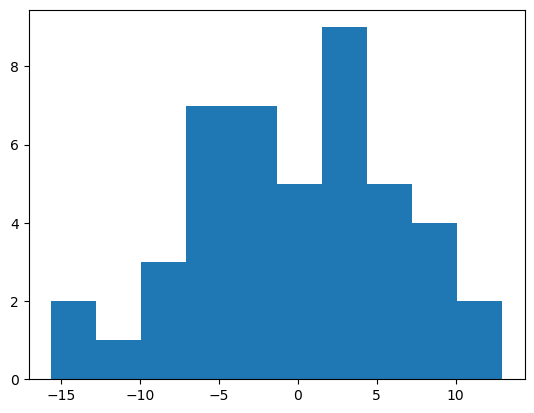

In [49]:
#Histogram to check for normally distributed residuals
print(e1.mean())
plt.hist(e1)

In [51]:
#Statistical test for normally distributed residuals - Shapiro-Wilk
#HO: Normally distributed data, HA: Non-normally distributed data
#If p-value is less than alpha, reject null of normally distributed data
shapiro_test = shapiro(e1)
shapiro_stat = shapiro_test[0]
shapiro_p = shapiro_test[1]

alpha = 0.05
shapiro_p < alpha

False

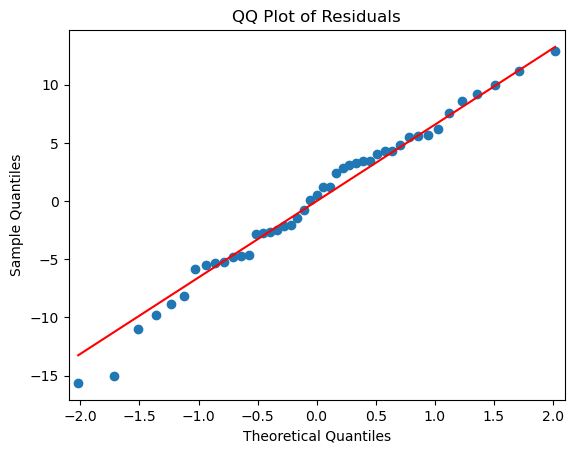

In [53]:
#QQ Plot for normality of residuals
sm.qqplot(results1.resid, line='s', dist=stats.norm)
plt.title("QQ Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

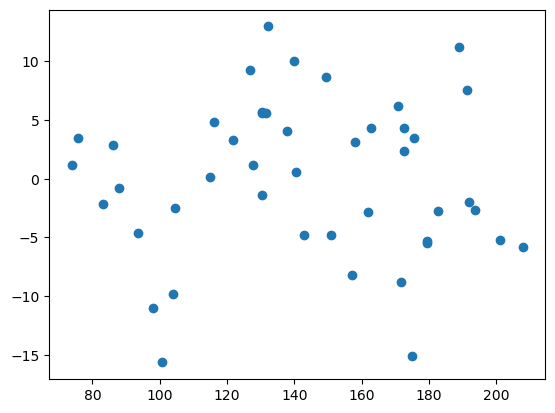

In [55]:
#Fitted values vs residuals to check for nonconstant error variance, aka heteroskedasticity
plt.scatter(yhat1, e1)
plt.show()

In [57]:
#Statistical tests for heteroskedasticity - Breusch Pagan and White
#HO: homoskedasticity, HA: heteroskedasticity
white_test = het_white(e1, X)
bp_test = het_breuschpagan(e1, X)
print("White's Test P-Value")
#print("LM Statistic:", white_test[0])
print("LM P-value:", white_test[1])
#print("F-Statistic:", white_test[2])
#print("F P-value:", white_test[3])
print("Breusch Pagan Test P-Value:")
print(bp_test[3])

#Interpretation:
#If the p-value of White's test is above the significance level (e.g., 0.05), we fail to reject the null hypothesis of homoskedasticity.
#If the p-value of Breusch-Pagan test is above the significance level (e.g., 0.05), we fail to reject the null hypothesis of homoskedasticity.

White's Test P-Value
LM P-value: 0.42982750997244235
Breusch Pagan Test P-Value:
0.4275600592993905


In [59]:
bp_test

(10.594438895724833, 0.3899746876187799, 1.046955523739112, 0.4275600592993905)

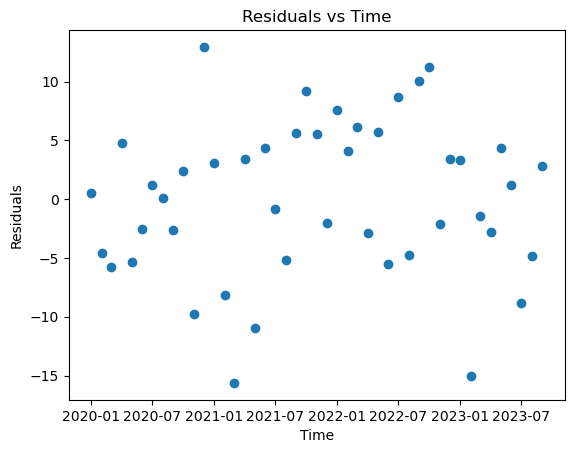

In [62]:
#Plot to detect autocorrelation - Residuals vs Time
plt.scatter(df.index, df['e1'])
plt.title('Residuals vs Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

In [64]:
#Statistical tests for autocorrelation - Durbin-Watson
#Close to 0 suggests positive autocorrelation, close to 4 suggests negative autocorrelation
#Between 1.5 and 2.5 suggests neither
dw_statistic = durbin_watson(e1)

print("Durbin-Watson Statistic:", dw_statistic)
1.5 < dw_statistic < 2.5

Durbin-Watson Statistic: 2.1913856871444333


True

In [67]:
#Statistical test for missing variables and/or incorrect functional form -Ramsey Reset test
#HO: No missing variables and correct functional form, HA: missing variables and/or incorrect functional form
reset_test = reset_ramsey(results1, degree=3)
reset_test

test_statistic = reset_test.statistic
p_value = reset_test.pvalue

print("Test statistic:", test_statistic)
print("p-value:", p_value)
p_value < alpha

Test statistic: 3.3476943670356802
p-value: 0.04784672647487967


True

In [69]:
#Outlier Detection - Studentized residuals
#Get influence measures
influence = results1.get_influence()
#Calculate studentized residuals
studentized_residuals = influence.resid_studentized_external
#Identify outliers using the common thresholds 
mild_outliers = np.where(np.abs(studentized_residuals) > 2)[0]
extreme_outliers = np.where(np.abs(studentized_residuals) > 3)[0]

print("Mild Outliers:", mild_outliers)
print("Extreme Outliers:", extreme_outliers)

Mild Outliers: [14 37]
Extreme Outliers: []


In [61]:
#Outlier Detection - Standardized residuals
df['e1']
residuals_stdev = df['e1'].std()
standardized_residuals = df['e1']/residuals_stdev
standardized_residuals
outliers = np.where(np.abs(standardized_residuals) > 3)[0]
outliers

array([], dtype=int64)

In [63]:
#Outlier detection - Cook's Distance
#Obtain Cook's distance 
cooksd = results.get_influence().cooks_distance[0]
#Calculate critical d
critical_d = 4 / len(df)
print('Critical Cooks distance:', critical_d)
#Identify potential outliers with leverage
out_d = cooksd > critical_d
#Output potential outliers with leverage
print(df.index[out_d], "\n", cooksd[out_d])

NameError: name 'results' is not defined

In [75]:
#Outlier detection - Influence Plot - Leverage vs Studentized Residuals
sm.graphics.influence_plot(results, criterion="cooks")

NameError: name 'results' is not defined

In [67]:
#Model 2, using quadratic term
y = df['vehicles_sold']
xvars = ['inventory_in_stock', 'interest_rate','sales_promo', 'average_discount', 'competitor_discount', 'local_average_temperature', 'max_sales_bonus', 'max_sales_bonus_sq', 'temp_in_china','recession', 'advertising_budget']
X = df[xvars]
model2 = sm.OLS(y,X)
results2 = model2.fit()
summary2 = results2.summary()
summary2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          vehicles_sold   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              1070.
Date:                Tue, 04 Mar 2025   Prob (F-statistic):                    8.17e-40
Time:                        18:11:00   Log-Likelihood:                         -156.95
No. Observations:                  45   AIC:                                      335.9
Df Residuals:                      34   BIC:                                      355.8
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
inventory_in_stock            0.4378      0.078      5.612      0.000       0.279       0.596
interest_rate                -1.5121      0.978     -1.545      0.132      -3.501       0.476
sales_promo                  -2.5046      4.879     -0.513      0.611     -12.420       7.410
average_discount              3.0662      0.920      3.333      0.002       1.197       4.936
competitor_discount           0.8330      0.588      1.417      0.166      -0.362       2.028
local_average_temperature    -0.1219      0.091     -1.336      0.190      -0.307       0.063
max_sales_bonus               0.0224      0.008      2.725      0.010       0.006       0.039
max_sales_bonus_sq        -3.161e-06   1.17e-06     -2.712      0.010   -5.53e-06   -7.93e-07
temp_in_china                 0.2458      0.088      2.779      0.009       0.066       0.426
recession                    -3.4534      5.090     -0.678      0.502     -13.798       6.891
advertising_budget            0.0006      0.002      0.318      0.752      -0.003       0.004
==============================================================================
Omnibus:                        1.352   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.509   Jarque-Bera (JB):                1.189
Skew:                          -0.225   Prob(JB):                        0.552
Kurtosis:                       2.343   Cond. No.                     7.22e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
#Gather Regression Statistics and Values
rsquared2 = results2.rsquared
adj_rsquared2 = results2.rsquared_adj
fstat2 = results2.fvalue
aic2 = results2.aic
bic2 = results2.bic
parameters2 = results2.params
tvalues2 = results2.tvalues
pvalues2 = results2.pvalues
ci2 = results2.conf_int(alpha=0.05)

In [81]:
from statsmodels.stats.anova import anova_lm

anova_result = anova_lm(results1, results2)
print(anova_result)

#print(p_values)
#If P-Value is below cutoff, 0.05 for our purposes, we reject the null hypothesis that the extra variables have zero predictive power

   df_resid          ssr  df_diff     ss_diff    F  Pr(>F)
0      34.0  1938.200175      0.0         NaN  NaN     NaN
1      34.0  2819.648159     -0.0 -881.447984  inf     NaN


In [83]:
#Comparing models - Valid for comparison as long as same dependent variable and untransformed

models = ['model1','model2']
r_squared = [rsquared1, rsquared2] #Larger = better
adj_r_squared = [adj_rsquared1, adj_rsquared2] #Larger = better
aic = [aic1, aic2] #Smaller = better
bic = [bic1, bic2] #Smaller = better

data = {
    'Model': models,
    'R-squared': r_squared,
    'Adjusted R-squared': adj_r_squared,
    'AIC': aic,
    'BIC': bic
}
df_stats = pd.DataFrame(data)

print(df_stats)

    Model  R-squared  Adjusted R-squared         AIC         BIC
0  model1   0.968529            0.959273  319.032834  338.906122
1  model2   0.997120            0.996188  335.901188  355.774476


In [85]:
X.head()

,inventory_in_stock,interest_rate,sales_promo,average_discount,competitor_discount,local_average_temperature,max_sales_bonus,max_sales_bonus_sq,temp_in_china,recession,advertising_budget
date,,,,,,,,,,,
2020-01-01,139,6,0,10,7,41,1628,2650384,82,0,4000
2020-02-01,122,7,0,3,13,39,1202,1444804,43,1,2500
2020-03-01,241,3,1,20,3,42,2560,6553600,47,0,6500
2020-04-01,123,9,0,7,12,59,5226,27311076,87,0,4500
2020-05-01,183,2,1,15,3,67,3699,13682601,66,0,7000


In [75]:
predictions = pd.DataFrame({'inventory_in_stock': [200,190],
                            'interest_rate': [3,2],
                            'sales_promo':[0,1],
                            'average_discount':[10,5],
                            'competitor_discount': [7,6],
                            'local_average_temperature':[50,55],
                            'max_sales_bonus':[4000,6000],
                            'max_sales_bonus_sq':[4000000,4000000],
                            'temp_in_china':[85,85],
                            'recession':[1,1],
                            'advertising_budget':[8000,4000]
                           })
preidictions = sm.add_constant(predictions)

predictions['estimated sales'] = results2.predict(predictions)
print(predictions)

   inventory_in_stock  interest_rate  sales_promo  average_discount  \
0                 200              3            0                10   
1                 190              2            1                 5   

   competitor_discount  local_average_temperature  max_sales_bonus  \
0                    7                         50             4000   
1                    6                         55             6000   

   max_sales_bonus_sq  temp_in_china  recession  advertising_budget  \
0             4000000             85          1                8000   
1             4000000             85          1                4000   

   estimated sales  
0       212.290629  
1       232.682462  
